In [6]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
import os
os.chdir(os.path.expanduser('~/wcEcoli'))
import numpy as np
import pandas as pd

In [7]:
# load in the data:
HL_data = "models/ecoli/analysis/local_notebooks/venn_diagram/data/merged_data.csv"
HL_data = pd.read_csv(HL_data)

# read in the other data to get the common names: 
common_names = "reconstruction/ecoli/scripts/protein_half_lives/Gupta_et_al_Clim_data/Clim_EcoCyc_monomer_ID_matches/41467_2024_49920_MOESM4_ESM_ST1_EcoCyc_monomer_ID_matches_11202024.tsv"

common_names = pd.read_csv(common_names, sep="\t", header=1)

# go through each id in the HL_data and get the "Common Name" that corresponds to the "Monomer ID" 
common_names_dict = {}
for index, row in common_names.iterrows():
    common_names_dict[row["Monomer ID"]] = row["Common Name"]
    
# add the common names to the HL_data
HL_data["common_name"] = HL_data["id"].map(common_names_dict)

HL_data

,id,protease_assignment,ClpP,Lon,HslV,Unexplained,degradation_rate(1/s),half_life_(min),degradation_rate_source,average_concentration,standard_deviation
0,EG10156-MONOMER,ClpP only,1.000000,0.000000,0.000000,0.000000,0.000143,80.656400,Gupta_et_al_MS_2024,3.486383e-06,2.392165e-06
1,MDLB-MONOMER,ClpP only,1.000000,0.000000,0.000000,0.000000,0.000022,527.946265,Gupta_et_al_MS_2024,7.175699e-06,1.164671e-05
2,EG10927-MONOMER,ClpP only,1.000000,0.000000,0.000000,0.000000,0.000018,640.789880,Gupta_et_al_MS_2024,3.572458e-07,5.789671e-07
3,EG10618-MONOMER,ClpP only,1.000000,0.000000,0.000000,0.000000,0.000023,498.593755,Gupta_et_al_MS_2024,6.118330e-07,6.525176e-07
4,AERGLYC3PDEHYDROG-MONOMER,ClpP only,0.993731,0.000000,0.000000,0.000000,0.000036,322.881971,Gupta_et_al_MS_2024,3.067243e-06,2.146631e-06
...,...,...,...,...,...,...,...,...,...,...,...
77,EG12690-MONOMER,"Additive: ClpP, Lon, HslV",0.277972,0.277364,0.378556,0.066108,0.000019,596.607579,Gupta_et_al_MS_2024,1.663928e-06,1.402802e-06
78,PD03831,"Additive: ClpP, Lon",0.519958,0.403122,0.000000,0.076920,0.000036,321.351724,Gupta_et_al_MS_2024,2.266592e-07,4.950785e-07
79,AROK-MONOMER,"Additive: ClpP, Lon, HslV",0.319436,0.429511,0.167152,0.083901,0.000035,328.132421,Gupta_et_al_MS_2024,1.181332e-03,2.879909e-04
80,G7263-MONOMER,"Additive: ClpP, Lon, HslV",0.183526,0.206054,0.520932,0.089488,0.000023,512.768046,Gupta_et_al_MS_2024,2.199079e-07,5.048420e-07


In [9]:
# count the number of different assignements in the protease_assignment column and how many times they appear
counts = HL_data['protease_assignment'].value_counts()
counts = counts.to_dict()
counts

{'ClpP only': 40,
 'Additive: ClpP, Lon, HslV': 32,
 'Lon only': 6,
 'Additive: ClpP, Lon': 3,
 'HslV only': 1}

# Venn Diagram

code adapted from https://python-graph-gallery.com/venn-diagram/

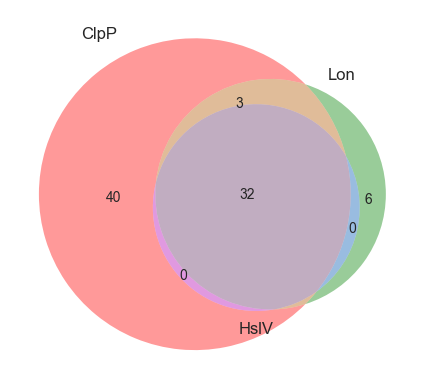

In [11]:
# Make the diagram
venn3(subsets = (40, 6, 3, 1, 0,0, 32), set_labels = ('ClpP', 'Lon', 'HslV'))

plt.show()

In [ ]:
# todo: I do not love this, realized the nubmers are a bit off to be nice

# Pie Plot

Code adapted from: https://python-graph-gallery.com/donut-plot/

Pros: easy to see

Cons: cannot put the #s on the chart itself, which might be nice (could just add it as brackets tho

Future things to explore: maybe split up more, into having a each pie slice have a lighter shade in it to represent monomers vs the darker shade representing complexes. 

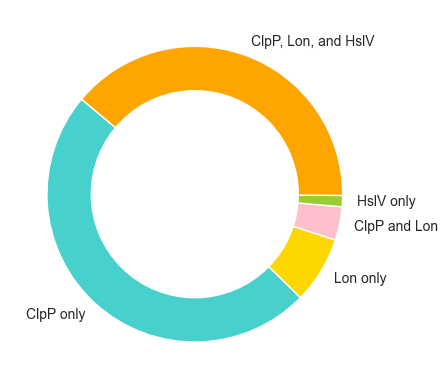

In [24]:
# library
import matplotlib.pyplot as plt

# create data
size_of_groups=[40, 6, 3, 1, 32]
# create data
names = ['ClpP only', 'Lon only', 'ClpP and Lon', 'HslV only', 'ClpP, Lon, and HslV']
colors = ['mediumturquoise','gold','pink','yellowgreen', 'orange']
# Create a pieplot
plt.pie(size_of_groups, labels=names, colors=colors, startangle=140, )

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')

p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()


# Tree map

code adapted from: https://python-graph-gallery.com/treemap/

In [27]:
import squarify
# create a color palette
cmap = load_cmap('Acadia')
category_codes, unique_categories = pd.factorize(df['parent'])
colors = [cmap(code) for code in category_codes]

# customize the labels
labels = [f"{name} ({parent[5:]})\n{value}" for name, value, parent in zip(df['name'], df['value'], df['parent'])]

# create a treemap
fig, ax = plt.subplots(figsize=(10,10))
ax.set_axis_off()
squarify.plot(
   sizes=df["value"],
   label=labels,
   color=colors,
   text_kwargs={
      'color':'white',
      'fontsize':8,
      'fontweight':'bold'
   },
   pad=True,
   ax=ax
)
plt.show()

NameError: name 'load_cmap' is not defined

In [26]:
# look into this plot: https://images.app.goo.gl/3jvx6heSbrWY16mM7


[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


# circular barplot

code adapted from: https://images.app.goo.gl/3jvx6heSbrWY16mM7


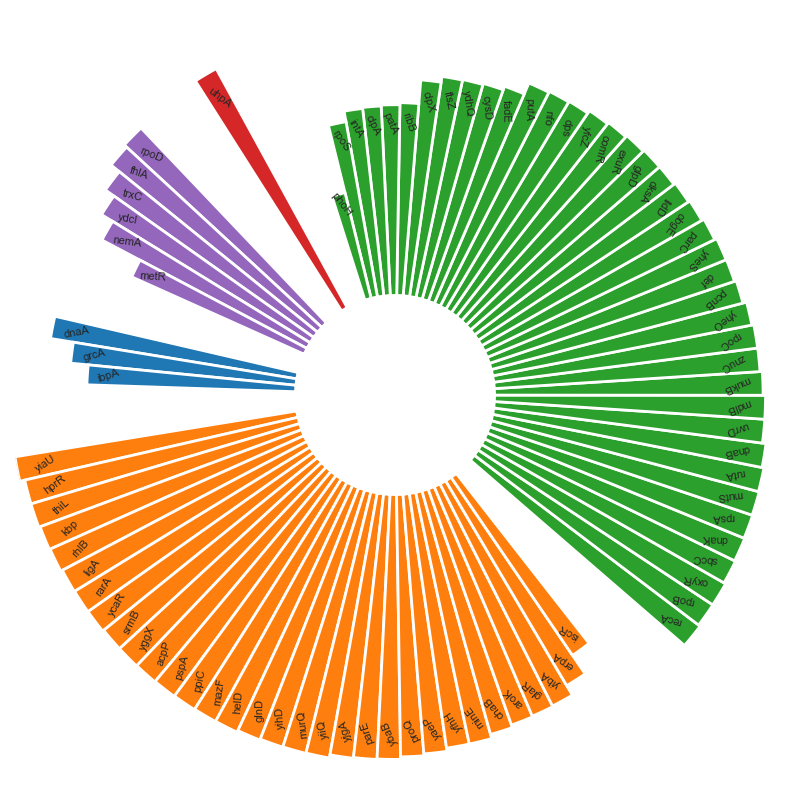

In [151]:
# Sort data within each group
HL_data_sorted = HL_data.sort_values(by=["protease_assignment", "half_life_(min)"], ascending=[True, False])
HL_data_sorted["log_half_life"] = np.log10(HL_data_sorted["half_life_(min)"].clip(lower=1))

# Update the values with the log-transformed data
VALUES = HL_data_sorted["log_half_life"].values
LABELS = HL_data_sorted["common_name"].values
GROUP = HL_data_sorted["protease_assignment"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)
GROUPS_SIZE = [len(i[1]) for i in HL_data.groupby("protease_assignment")]

offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(offset)
#ax.set_ylim(-10, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim(-1, max(VALUES))

GROUPS_SIZE = [len(i[1]) for i in HL_data.groupby("protease_assignment")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2, label=LABELS
)

for angle, value, label in zip(ANGLES[IDXS], VALUES, LABELS):
    ax.text(
        angle, value *.9, label,  # Position the label a bit above the bar
        ha='center', va='center', 
        fontsize=8, rotation=np.degrees(angle),
        rotation_mode='anchor'
    )


Non-log version:

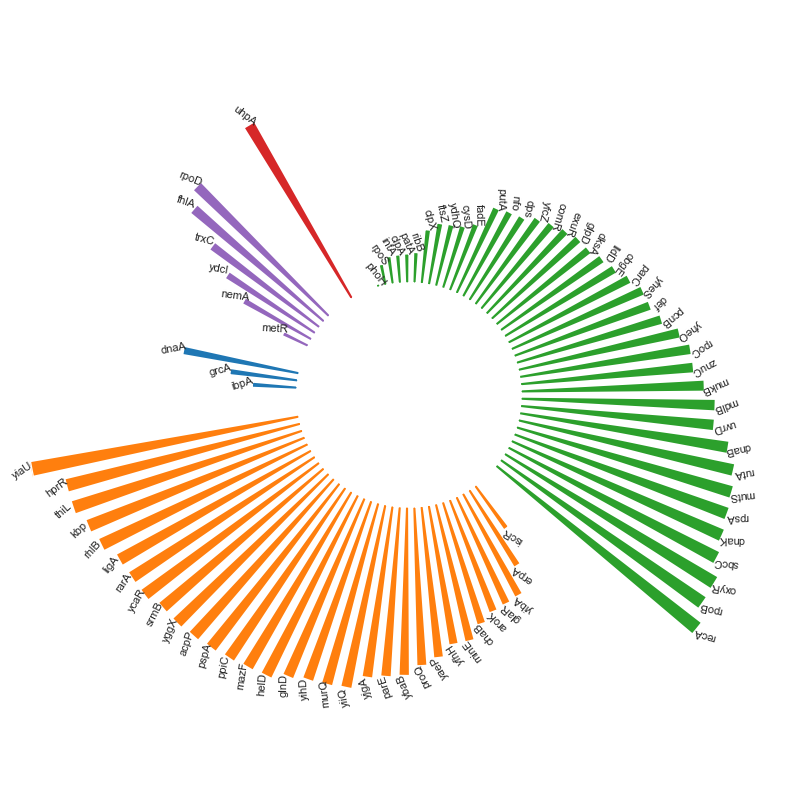

In [80]:
# Sort data within each group
HL_data_sorted = HL_data.sort_values(by=["protease_assignment", "half_life_(min)"], ascending=[True, False])

# Update the values with the log-transformed data
VALUES = HL_data_sorted["half_life_(min)"].values
LABELS = HL_data_sorted["common_name"].values
GROUP = HL_data_sorted["protease_assignment"].values


PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / (len(ANGLES) * 1.5)

GROUPS_SIZE = [len(i[1]) for i in HL_data.groupby("protease_assignment")]


offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(offset)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim(-300, max(VALUES))

GROUPS_SIZE = [len(i[1]) for i in HL_data.groupby("protease_assignment")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# Add bars to represent ...
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2, label=LABELS
)

#add_labels(ANGLES[IDXS], VALUES, offset, LABELS, ax)
labelPadding = 4
lowerLimit = 0
for angle, value, label in zip(ANGLES[IDXS], VALUES, LABELS):
    ax.text(
        angle, value +25, label,  # Position the label a bit above the bar
        ha='center', va='center', 
        fontsize=8, rotation=np.degrees(angle),
        rotation_mode='anchor'
    )


# attempt to merge the circle plot with the crona

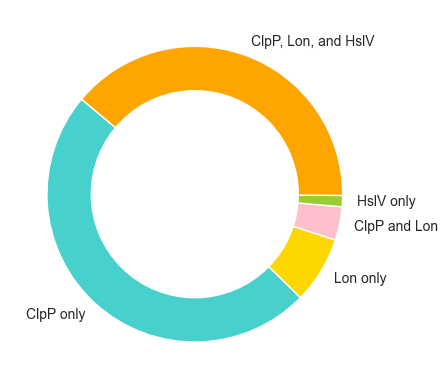

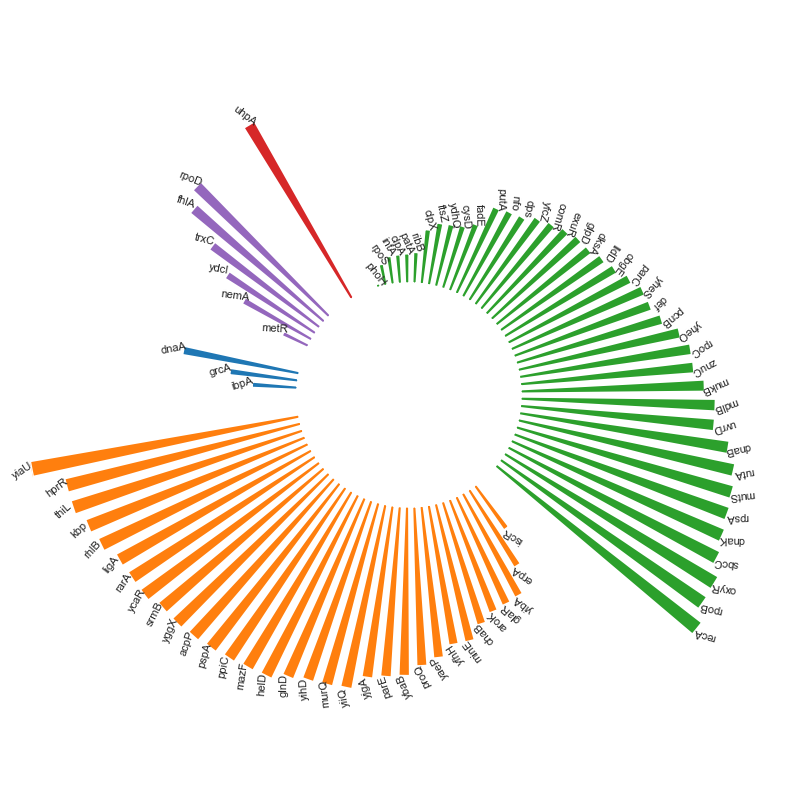

In [82]:

# create data
size_of_groups=[40, 6, 3, 1, 32]
# create data
names = ['ClpP only', 'Lon only', 'ClpP and Lon', 'HslV only', 'ClpP, Lon, and HslV']
colors = ['mediumturquoise','gold','pink','yellowgreen', 'orange']
# Create a pieplot
plt.pie(size_of_groups, labels=names, colors=colors, startangle=140, )

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')

p=plt.gcf()
p.gca().add_artist(my_circle)

# Sort data within each group
HL_data_sorted = HL_data.sort_values(by=["protease_assignment", "half_life_(min)"], ascending=[True, False])

# Update the values with the log-transformed data
VALUES = HL_data_sorted["half_life_(min)"].values
LABELS = HL_data_sorted["common_name"].values
GROUP = HL_data_sorted["protease_assignment"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / (len(ANGLES) * 1.5)
GROUPS_SIZE = [len(i[1]) for i in HL_data.groupby("protease_assignment")]

offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(offset)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim(-300, max(VALUES))

GROUPS_SIZE = [len(i[1]) for i in HL_data.groupby("protease_assignment")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2, label=LABELS)

for angle, value, label in zip(ANGLES[IDXS], VALUES, LABELS):
    ax.text(
        angle, value +25, label,  # Position the label a bit above the bar
        ha='center', va='center', 
        fontsize=8, rotation=np.degrees(angle),
        rotation_mode='anchor'
    )


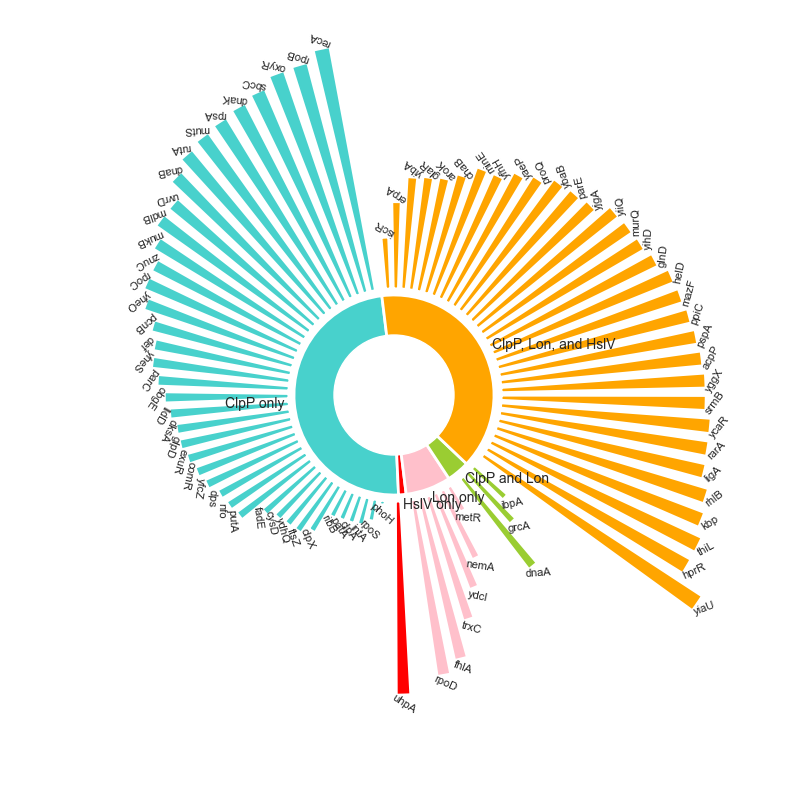

In [145]:
# create data for the donut
size_of_groups=[40, 1, 6, 3, 32]
names = ['ClpP only','HslV only', 'Lon only', 'ClpP and Lon', 'ClpP, Lon, and HslV']
colors = ['mediumturquoise','red','pink','yellowgreen', 'orange']

color_mapping = {
    'ClpP only': 'mediumturquoise',
    'HslV only': 'red',
    'Lon only': 'pink',
    'Additive: ClpP, Lon': 'yellowgreen',
    'Additive: ClpP, Lon, HslV': 'orange'
}

# create data for the circular bar plot
VALUES = HL_data_sorted["half_life_(min)"].values
LABELS = HL_data_sorted["common_name"].values
GROUP = HL_data_sorted["protease_assignment"].values

fig = plt.figure(figsize=(20, 10))

# Add the circular bar chart (polar plot)
ax_bar = fig.add_subplot(111, polar=True)

PAD = 1
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / (len(ANGLES) * 1.5)
GROUPS_SIZE = [len(i[1]) for i in HL_data.groupby("protease_assignment")]

offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

# Bar chart settings
ax_bar.set_theta_offset(offset)
ax_bar.set_ylim(-300, max(VALUES) + 50)
ax_bar.set_frame_on(False)
ax_bar.xaxis.grid(False)
ax_bar.yaxis.grid(False)
ax_bar.set_xticks([])
ax_bar.set_yticks([])

GROUPS_SIZE = [len(i[1]) for i in HL_data.groupby("protease_assignment")]
COLORS = [color_mapping[group] for group in GROUP]

# Plot the circular bars
ax_bar.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS,
    edgecolor="white", linewidth=2
)

# Add labels for the bars
for angle, value, label in zip(ANGLES[IDXS], VALUES, LABELS):
    ax_bar.text(
        angle, value + 25, label,
        ha='center', va='center',
        fontsize=8, rotation=np.degrees(angle),
        rotation_mode='anchor'
    )

# Add the donut chart (as an inset)
ax_pie = fig.add_axes([0.387, 0.37, 0.25, 0.25])  # [left, bottom, width, height]
ax_pie.pie(size_of_groups, labels=names, colors=colors, startangle=97, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })

# Add the circle to make it a donut
my_circle = plt.Circle((0, 0), 0.6, color='white')
ax_pie.add_artist(my_circle)

# Remove pie chart borders and grids
ax_pie.set_aspect('equal')

plt.show()


In [ ]:
# could also try a nested pie plot: https://images.app.goo.gl/3RPUP8Bm5SWkMFi78